In [4]:
import os
import shutil
import pandas as pd
import tensorflow as tf

In [5]:
skin_cancer = 'dataset/Skin_Cancer_Dataset'
normal_skin = 'dataset/normal'
results = 'dataset/result'

os.makedirs(results, exist_ok=True)

labels = ['Basal Cell Carcinoma','Melanoma', 'Squamous Cell Carcinoma', 'Normal']
for label in labels:
  os.makedirs(os.path.join(results, label), exist_ok=True)

for label in labels[:-1]:
  label_path = os.path.join(skin_cancer, label)
  if os.path.exists(label_path):
    for file in os.listdir(label_path):
      shutil.copy(os.path.join(label_path, file), os.path.join(results, label))

for file in os.listdir(normal_skin):
  shutil.copy(os.path.join(normal_skin, file), os.path.join(results, 'Normal'))

In [6]:
from PIL import Image

def clean_data(directory):
  for label in os.listdir(directory):
    label_path = os.path.join(directory, label)
    if file in os.listdir(label_path):
      file_path = os.path.join(label_path, file)
      try:
        img = Image.open(file_path)
        img.verify()
        img = Image.open(file_path)
        img.load()
      except Exception as e:
        print(f"Delete: {file_path}, Error: {e}")
        os.remove(file_path)

clean_data(results)

                     class  count
0     Basal Cell Carcinoma    500
1                 Melanoma    505
2                   Normal    179
3  Squamous Cell Carcinoma    414


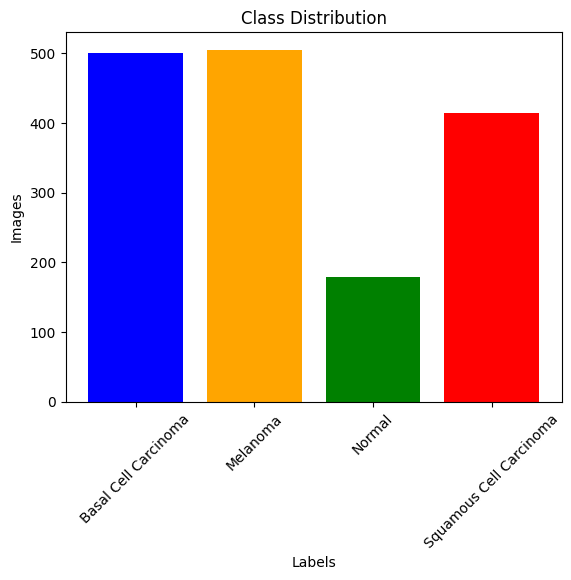

In [7]:
import matplotlib.pyplot as plt

def distribution_data(directory):
  count = {}
  for label in os.listdir(directory):
    label_path = os.path.join(directory, label)
    count[label] = len(os.listdir(label_path))
  return count

class_distribution = distribution_data(results)

# DataFrame distributions
df = pd.DataFrame(list(class_distribution.items()), columns=['class', 'count'])
print(df)

plt.bar(class_distribution.keys(), class_distribution.values(),
        color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Labels')
plt.ylabel('Images')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

In [8]:
df

,class,count
0,Basal Cell Carcinoma,500
1,Melanoma,505
2,Normal,179
3,Squamous Cell Carcinoma,414


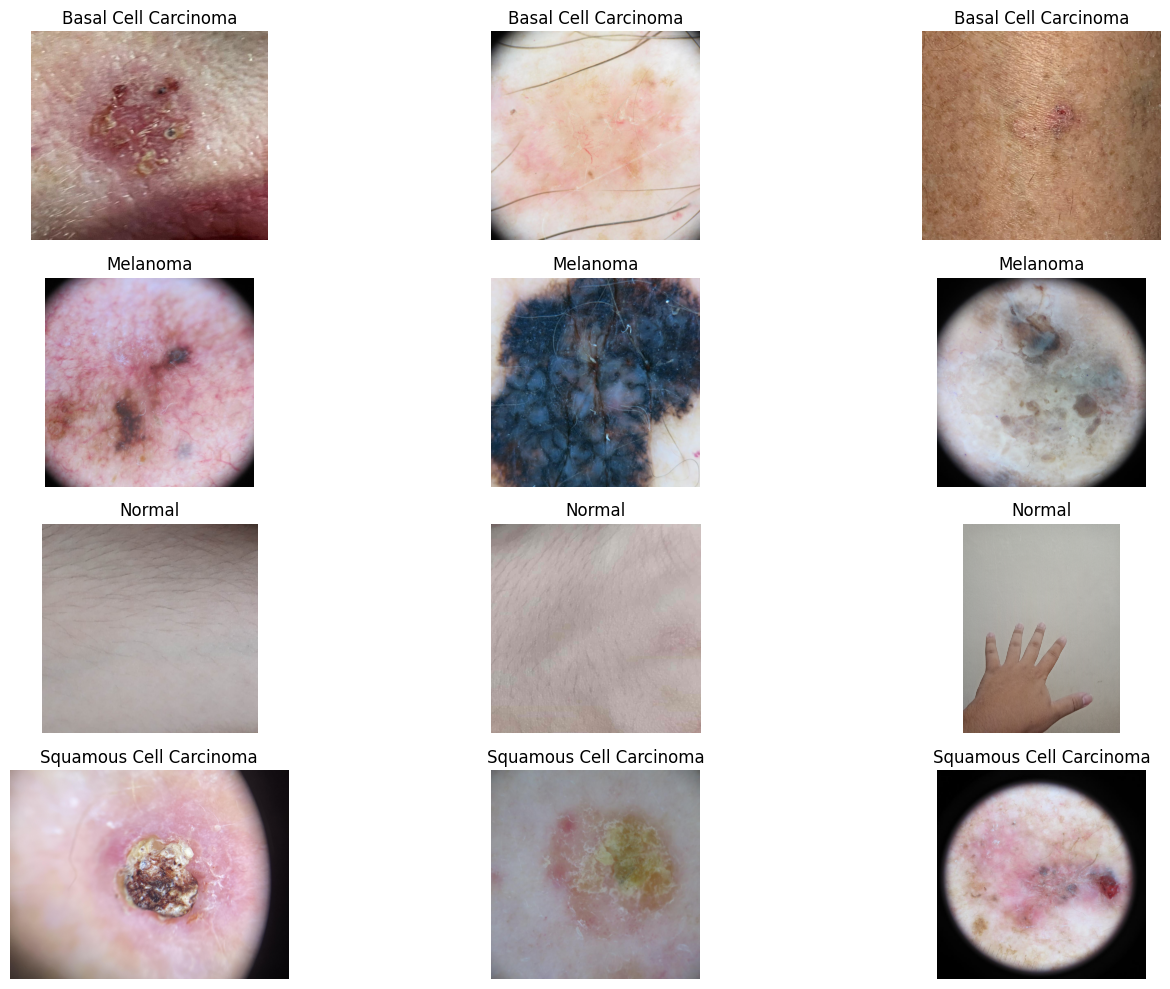

In [9]:
import random

# Visualisasi sampel gambar
def plot_sample_images(directory, classes, num_samples=3):
    fig, axes = plt.subplots(len(classes), num_samples, figsize=(15, 10))
    for i, cls in enumerate(classes):
        cls_path = os.path.join(directory, cls)
        samples = random.sample(os.listdir(cls_path), num_samples)
        for j, sample in enumerate(samples):
            img_path = os.path.join(cls_path, sample)
            img = Image.open(img_path)
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            axes[i, j].set_title(cls)
    plt.tight_layout()
    plt.show()


plot_sample_images(results, list(class_distribution.keys()))

In [10]:
# import numpy as np

# # Preprocess gambar
# def preprocess_images(directory, target_size=(224, 224)):
#     processed_data = []
#     labels = []
#     class_mapping = {cls: i for i, cls in enumerate(os.listdir(directory))}

#     for cls in os.listdir(directory):
#         cls_path = os.path.join(directory, cls)
#         for file in os.listdir(cls_path):
#             file_path = os.path.join(cls_path, file)
#             try:
#                 img = Image.open(file_path).resize(target_size)
#                 img_array = np.array(img) / 255.0  # Normalisasi
#                 processed_data.append(img_array)
#                 labels.append(class_mapping[cls])
#             except Exception as e:
#                 print(f"Error processing {file_path}: {e}")
#     return np.array(processed_data), np.array(labels)


# # Preprocess dataset
# X, y = preprocess_images(results)
# print(f"Processed data shape: {X.shape}, Labels shape: {y.shape}")

In [11]:
# from sklearn.model_selection import train_test_split


# def split_data(source, destination, split_ratio, labels):
#   train = os.path.join(destination, 'train')
#   val = os.path.join(destination, 'val')
#   test =  os.path.join(destination, 'test')

#   os.makedirs(train, exist_ok=True)
#   os.makedirs(val, exist_ok=True)
#   os.makedirs(test, exist_ok=True)

#   for label in labels:
#     label_path = os.path.join(source, label)
#     files = os.listdir(label_path)

#     # splitt 
#     train_files, temp_files = train_test_split(files, test_size=(1 - split_ratios[0]), random_state=42)
#     val_files, test_files = train_test_split(temp_files, test_size=(split_ratios[2] / sum(split_ratios[1:])), random_state=42)

#     # Pindahkan file ke folder baru
#     for phase, phase_files in zip(['train', 'val', 'test'], [train_files, val_files, test_files]):
#         phase_dir = os.path.join(destination, phase, label)
#         os.makedirs(phase_dir, exist_ok=True)
#         for file in phase_files:\
#             shutil.copy(os.path.join(label_path, file), os.path.join(phase_dir, file))

# # Path split data
# split_ratios = [0.7, 0.2, 0.1]  # Train, Validation, Test
# split_data(results, './dataset/split', split_ratios, labels)

## Augmentation data

In [12]:
from sklearn.model_selection import train_test_split

def split_data(source, destination, split_ratios, labels):
  train = os.path.join(destination, 'train')
  test = os.path.join(destination, 'test')
  val = os.path.join(destination, 'val')

  os.makedirs(train, exist_ok=True)
  os.makedirs(test, exist_ok=True)
  os.makedirs(val, exist_ok=True)

  for label in labels:
    label_path = os.path.join(source, label)
    files = os.listdir(label_path)

    train_files, temp_files = train_test_split(files, test_size=(1- split_ratios[0]), random_state=42)
    test_files, val_files = train_test_split(temp_files, test_size=(split_ratios[2] / sum(split_ratios[1:])), random_state=42)

    for phase, phase_files in zip(['train', 'test', 'val'], [train_files, test_files, val_files]):
      phase_dir = os.path.join(destination, phase, label)
      os.makedirs(phase_dir, exist_ok=True)
      for file in phase_files:
        shutil.copy(os.path.join(label_path, file), os.path.join(phase_dir, file))

# split_ratios = [0.7, 0.2, 0.1]
# split_dir = './dataset/split'
# split_data(results, split_dir, split_ratios, labels)

In [14]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# import numpy as np

# image_gen = ImageDataGenerator(
#   rotation_range = 20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# target_count = 500

# def augment_images(source_dir, destination_dir, class_name, count):
#   class_dir = os.path.join(source_dir, class_name)
#   out_class_dir = os.path.join(destination_dir, class_name)
#   os.makedirs(out_class_dir, exist_ok=True)

#   images = [img for img in os.listdir(class_dir) if img.endswith(('.png', '.jpg', '.jpeg', '.JPG'))]
#   current_count = len(images)

#   print(f"Processing class {class_name} with {current_count} images...")

#   while current_count < target_count:
#     for img_name in images:
#       img_path = os.path.join(class_dir, img_name)
#       img = load_img(img_path)
#       x = img_to_array(img)
#       x = np.expand_dims(x, axis=0)

#       for batch in image_gen.flow(x, batch_size=1, save_to_dir=out_class_dir, save_prefix='aug', save_format='jpg'):
#         current_count += 1
#         if current_count >= target_count:
#             break

# for class_name in labels:
#     class_dir = os.path.join(train_dir, class_name)
#     if os.path.exists(class_dir) and len(os.listdir(class_dir)) < target_count:
#         augment_images(train_dir, out_aug_dir, class_name, target_count)

# print("Augmentation completed!")



In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def augment_to_balanced(train_dir, labels):
  image_gen = ImageDataGenerator(
    rotation_range = 45,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
  )

  class_counts = get_class_count(train_dir, labels)
  max_count = max(class_counts.values())

  print("Current class distribution:")
  for label, count in class_counts.items():
    print(f"{label}: {count}")
  print(f"\nTarget count per class: {max_count}")
    
    # Augmentasi untuk setiap kelas
  for label in labels:
      current_count = class_counts[label]
      if current_count < max_count:
          needed_images = max_count - current_count
          class_dir = os.path.join(train_dir, label)
          
          print(f"\nProcessing {label}")
          print(f"Need to generate {needed_images} more images")
          
          existing_files = [f for f in os.listdir(class_dir) 
                          if f.endswith(('.png', '.jpg', '.jpeg', '.JPG'))]
          
          generated_count = 0
          while generated_count < needed_images:
              img_name = np.random.choice(existing_files)
              img_path = os.path.join(class_dir, img_name)
              
              img = load_img(img_path)
              x = img_to_array(img)
              x = np.expand_dims(x, axis=0)
              
              aug_iter = image_gen.flow(
                  x, 
                  batch_size=1,
                  save_to_dir=class_dir,
                  save_prefix=f'aug_{generated_count}',
                  save_format='jpg'
              )
              
              next(aug_iter)
              generated_count += 1
              if generated_count % 10 == 0:
                  print(f"Generated {generated_count}/{needed_images} images")

  print("\nFinal class distribution:")
  final_counts = get_class_count(train_dir, labels)
  for label, count in final_counts.items():
      print(f"{label}: {count}")

# Penggunaan
labels = ['Basal Cell Carcinoma', 'Melanoma', 'Normal', 'Squamous Cell Carcinoma']
split_ratios = [0.7, 0.2, 0.1]
split_dir = './dataset/split'

# Split data
split_data(results, split_dir, split_ratios, labels)

# Augmentasi data di direktori train
train_dir = os.path.join(split_dir, 'train')
augment_to_balanced(train_dir, labels)

Current class distribution:
Basal Cell Carcinoma: 353
Melanoma: 353
Normal: 353
Squamous Cell Carcinoma: 353

Target count per class: 353

Final class distribution:
Basal Cell Carcinoma: 353
Melanoma: 353
Normal: 353
Squamous Cell Carcinoma: 353


## Aug

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=45,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_dir = './dataset/split/train'
val_dir = './dataset/split/val'

# Data Generator
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_gen = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)

Found 1412 images belonging to 4 classes.
Found 162 images belonging to 4 classes.


In [17]:
# import tensorflow as tf
# from tensorflow.keras.regularizers import l2

# model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(
#         224, 224, 3), kernel_regularizer=l2(0.01)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu',
#                            kernel_regularizer=l2(0.01)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Conv2D(128, (3, 3), activation='relu',
#                            kernel_regularizer=l2(0.01)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Dropout(0.3),  # Dropout untuk lapisan convolutional

#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(4, activation='softmax')  # 4 kelas output
# ])

In [18]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
#                            input_shape=(224, 224, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2, 2),

#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dropout(0.5),  # Regularization
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(0.5),  # Regularization
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(4, activation='softmax')  # 4 classes
# ])

# optimizer_adam = Adam(learning_rate=1e-4)

In [19]:
model_sequential = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l2(0.05)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l2(0.05)),
    tf.keras.layers.Dense(4, activation='softmax')]
)

In [20]:
# # Model
# model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
#                            input_shape=(224, 224, 3)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(2, 2),

#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(2, 2),

#     tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(2, 2),

#     tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(2, 2),

#     tf.keras.layers.GlobalAveragePooling2D(),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(4, activation='softmax')  # 4 classes
# ])

# optimizer_adam = Adam(learning_rate=1e-4)

In [21]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
#                            input_shape=(224, 224, 3)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(2, 2),

#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(2, 2),

#     tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(2, 2),

#     tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(2, 2),

#     tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(2, 2),

#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dropout(0.5),  # Regularization
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(0.5),  # Regularization
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(4, activation='softmax')  # 4 classes
# ])

# optimizer_adam = Adam(learning_rate=1e-4)

In [22]:
model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 220, 220, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                        

In [23]:
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [24]:
# print("Total training samples:", train_gen.samples)
# print("Total validation samples:", val_gen.samples)

In [25]:
# print("Train samples:", train_gen.samples)
# print("Validation samples:", val_gen.samples)
# print("Test samples:", test_gen.samples)

In [26]:
# model.compile(
#     optimizer=optimizer_sgd,
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

# # Callbacks
# early_stop = EarlyStopping(
#     monitor='val_loss',
#     patience=10,
#     restore_best_weights=True,
#     verbose=1
# )

# reduce_lr = ReduceLROnPlateau(
#     monitor='val_loss',
#     factor=0.5,
#     patience=5,
#     verbose=1
# )

In [27]:
optimizer_adam = Adam(learning_rate=1e-4)

model_sequential.compile(
    optimizer=optimizer_adam,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# # Callbacks
# early_stop = EarlyStopping(
#     monitor='val_loss',
#     patience=10,
#     restore_best_weights=True,
#     verbose=1
# )

# reduce_lr = ReduceLROnPlateau(
#     monitor='val_loss',
#     factor=0.5,
#     patience=5,
#     verbose=1
# )

In [28]:
# checkpoint = ModelCheckpoint(
#     'best_model.keras', monitor='val_loss', save_best_only=True, verbose=1
# )


checkpoint = ModelCheckpoint(
    'best_model.keras', monitor='val_loss', save_best_only=True, verbose=1
)

In [29]:
# Model Training
history = model_sequential.fit(
    train_gen,
    steps_per_epoch=train_gen.samples // train_gen.batch_size,
    epochs=50,
    validation_data=val_gen,
    validation_steps=val_gen.samples // val_gen.batch_size,
    # callbacks=[early_stop, reduce_lr, checkpoint],
    verbose=2
)

# history = model.fit(
#     train_gen,
#     steps_per_epoch=len(train_gen),
#     epochs=50,
#     validation_data=val_gen,
#     validation_steps=len(val_gen),
#     callbacks=[early_stop, reduce_lr],
#     verbose=2
# )

Epoch 1/50


44/44 - 346s - loss: 67.2471 - accuracy: 0.4087 - val_loss: 65.5029 - val_accuracy: 0.1125 - 346s/epoch - 8s/step
Epoch 2/50
44/44 - 325s - loss: 60.0176 - accuracy: 0.4420 - val_loss: 65.2879 - val_accuracy: 0.1125 - 325s/epoch - 7s/step
Epoch 3/50
44/44 - 365s - loss: 53.2531 - accuracy: 0.4580 - val_loss: 57.9485 - val_accuracy: 0.1063 - 365s/epoch - 8s/step
Epoch 4/50
44/44 - 326s - loss: 47.1670 - accuracy: 0.4500 - val_loss: 52.0186 - val_accuracy: 0.1125 - 326s/epoch - 7s/step
Epoch 5/50
44/44 - 317s - loss: 41.3980 - accuracy: 0.4616 - val_loss: 56.5949 - val_accuracy: 0.1125 - 317s/epoch - 7s/step
Epoch 6/50
44/44 - 288s - loss: 36.5047 - accuracy: 0.4652 - val_loss: 41.0096 - val_accuracy: 0.1125 - 288s/epoch - 7s/step
Epoch 7/50
44/44 - 315s - loss: 32.0989 - accuracy: 0.4797 - val_loss: 31.9392 - val_accuracy: 0.3250 - 315s/epoch - 7s/step
Epoch 8/50


KeyboardInterrupt: 

In [14]:
# model.compile(
#     optimizer=optimizer_adam,
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

# # Callbacks
# early_stop = EarlyStopping(
#     monitor='val_loss',
#     patience=10,
#     restore_best_weights=True
# )

# reduce_lr = ReduceLROnPlateau(
#     monitor='val_loss',
#     factor=0.5,
#     patience=5,
#     verbose=1
# )

In [20]:
# history = model.fit(
#     train_gen,
#     steps_per_epoch=train_gen.samples // train_gen.batch_size,
#     epochs=50,
#     validation_data=val_gen,
#     validation_steps=val_gen.samples // val_gen.batch_size,
#     class_weight=class_weight_dict,
#     callbacks=[early_stop, reduce_lr],
#     verbose=2
# )

In [ ]:
# # Pelatihan model
# history = model.fit(
#     train_gen,
#     steps_per_epoch=train_gen.samples // train_gen.batch_size,
#     epochs=50,
#     validation_data=val_gen,
#     validation_steps=val_gen.samples // val_gen.batch_size,
#     callbacks=[early_stop, reduce_lr],
#     verbose=2
# )

In [23]:
# class DebugCallback(tf.keras.callbacks.Callback):
#     def on_train_batch_end(self, batch, logs=None):
#         x_batch, y_batch = self.model.train_on_batch
#         print(f"Batch {batch} ended. Input shape: {
#               x_batch.shape}, Labels shape: {y_batch.shape}")

In [ ]:
# import cv2
# import os

# for root, _, files in os.walk('./dataset'):
#     for file in files:
#         filepath = os.path.join(root, file)
#         try:
#             img = cv2.imread(filepath)
#             if img is None:
#                 print(f"Unreadable image: {filepath}")
#         except Exception as e:
#             print(f"Error with image {filepath}: {e}")

In [ ]:
def PlotHistModel(hist, typePlt):
    plt.plot(hist.history[typePlt])
    plt.ylabel(typePlt)
    plt.xlabel('Epochs')
    plt.legend(['train'], loc='upper left')
    plt.show()


PlotHistModel(history, 'accuracy')

In [ ]:
PlotHistModel(history, 'loss')

In [ ]:
test_loss, test_acc = model.evaluate(val_gen)
print(f"Validation Loss: {test_loss}, Validation Accuracy: {test_acc}")

In [ ]:
train_loss, train_acc = model.evaluate(train_gen)
print(f"Training Loss: {train_loss}, Training Accuracy: {train_acc}")

In [ ]:
test_loss, test_acc = model.evaluate(test_gen)
print(f"Testing Loss: {test_loss}, Testing Accuracy: {test_acc}")

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Mendapatkan prediksi
Y_pred = model.predict(val_gen)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_gen.classes

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Mendapatkan label kelas
class_labels = list(val_gen.class_indices.keys())

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def calculate_metrics_per_class(cm, class_idx):
    TP = cm[class_idx, class_idx]
    FP = np.sum(cm[:, class_idx]) - TP
    FN = np.sum(cm[class_idx, :]) - TP
    TN = np.sum(cm) - (TP + FP + FN)

    # Menghitung metrik
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision +
                                           recall) if (precision + recall) != 0 else 0

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score,
        'TP': TP,
        'FP': FP,
        'FN': FN,
        'TN': TN
    }


# Menghitung metrik untuk setiap kelas dan menyimpan dalam DataFrame
metrics_list = []
for idx, class_name in enumerate(class_labels):
    metrics = calculate_metrics_per_class(cm, idx)
    metrics['Class'] = class_name  # Menambahkan nama kelas
    metrics_list.append(metrics)

# Membuat DataFrame dari list metrik
df_metrics = pd.DataFrame(metrics_list)
df_metrics

In [ ]:

# Visualisasi confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# def calculate_metrics_per_class(cm, class_idx):
#     TP = cm[class_idx, class_idx]
#     FP = np.sum(cm[:, class_idx]) - TP
#     FN = np.sum(cm[class_idx, :]) - TP
#     TN = np.sum(cm) - (TP + FP + FN)

#     # Menghitung metrik
#     accuracy = (TP + TN) / (TP + TN + FP + FN)
#     precision = TP / (TP + FP) if (TP + FP) != 0 else 0
#     recall = TP / (TP + FN) if (TP + FN) != 0 else 0
#     f1_score = 2 * (precision * recall) / (precision +
#                                            recall) if (precision + recall) != 0 else 0

#     return {
#         'Accuracy': accuracy,
#         'Precision': precision,
#         'Recall': recall,
#         'F1-Score': f1_score,
#         'TP': TP,
#         'FP': FP,
#         'FN': FN,
#         'TN': TN
#     }


# # Visualisasi confusion matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#             xticklabels=class_labels,
#             yticklabels=class_labels)
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

# # Menampilkan metrik untuk setiap kelas
# print("\nMetrik per kelas:")
# for idx, class_name in enumerate(class_labels):
#     metrics = calculate_metrics_per_class(cm, idx)
#     print(f"\nKelas: {class_name}")
#     print(f"True Positives (TP): {metrics['TP']}")
#     print(f"False Positives (FP): {metrics['FP']}")
#     print(f"False Negatives (FN): {metrics['FN']}")
#     print(f"True Negatives (TN): {metrics['TN']}")
#     print(f"Accuracy: {metrics['Accuracy']:.4f}")
#     print(f"Precision: {metrics['Precision']:.4f}")
#     print(f"Recall: {metrics['Recall']:.4f}")
#     print(f"F1-Score: {metrics['F1-Score']:.4f}")

In [ ]:
# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Visualisasi metrik per kelas dalam bentuk bar chart
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
class_metrics = []

for idx in range(len(class_labels)):
    metrics = calculate_metrics_per_class(cm, idx)
    class_metrics.append([metrics[metric] for metric in metrics_names])

class_metrics = np.array(class_metrics)

# Plot bar chart untuk setiap metrik
plt.figure(figsize=(15, 6))
x = np.arange(len(class_labels))
width = 0.2

for i, metric in enumerate(metrics_names):
    plt.bar(x + i*width, class_metrics[:, i], width, label=metric)

plt.xlabel('Classes')
plt.ylabel('Score')
plt.title('Metrics per Class')
plt.xticks(x + width*1.5, class_labels, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# optimizer_adam = Adam(learning_rate=1e-4)
# sgd_compiler = SGD(learning_rate=0.01, momentum=0.9)

# model.compile(
#     optimizer=optimizer_adam,
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

# # callbacks
# eary_stop = EarlyStopping(
#     monitor='val_loss',
#     patience=10,
#     restore_best_weights=True
# )

# reduce_lr = ReduceLROnPlateau(
#     monitor='val_loss',
#     factor=0.5,
#     patience=5,
#     verbose=1
# )

In [ ]:
# history = model.fit(
#     train_gen,
#     steps_per_epoch=val_test_datagen.samples // val_test_datagen.batch_size,
#     epochs=40,
#     validation_data=val_test_datagen,
#     validation_steps=val_test_datagen.samples // val_test_datagen.batch_size,
#     verbose=2,
#     callbacks=[eary_stop, reduce_lr]
# )

In [ ]:
# from tensorflow.keras.applications import EfficientNetB0
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
# from tensorflow.keras.optimizers import Adam

# # Load arsitektur EfficientNetB0
# base_model = EfficientNetB0(
#     weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# # Tambahkan layer custom
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(128, activation='relu')(x)
# predictions = Dense(len(labels), activation='softmax')(x)

# model = Model(inputs=base_model.input, outputs=predictions)

# # Freeze pretrained layers
# for layer in base_model.layers:
#     layer.trainable = False

# # Compile model
# model.compile(optimizer=Adam(learning_rate=0.001),
#               loss='categorical_crossentropy', metrics=['accuracy'])

# # Train model
# history = model.fit(train_gen, validation_data=val_gen, epochs=15)

In [ ]:
# import cv2
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report

# # Ekstraksi fitur HOG
# def extract_hog_features(image_dir):
#     data, labels = [], []
#     for cls in labels:
#         cls_dir = os.path.join(image_dir, cls)
#         for file in os.listdir(cls_dir):
#             img = cv2.imread(os.path.join(cls_dir, file), cv2.IMREAD_GRAYSCALE)
#             img = cv2.resize(img, (128, 128))
#             hog = cv2.HOGDescriptor()
#             h = hog.compute(img).flatten()
#             data.append(h)
#             labels.append(cls)
#     return data, labels


# # Ekstraksi fitur
# train_data, train_labels = extract_hog_features('./dataset/split/train')
# test_data, test_labels = extract_hog_features('./dataset/split/test')

# # Train Random Forest
# rf = RandomForestClassifier()
# rf.fit(train_data, train_labels)

# # Evaluate
# preds = rf.predict(test_data)
# print(classification_report(test_labels, preds))

In [ ]:
# # Plot evaluasi
# import matplotlib.pyplot as plt

# # Accuracy plot
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.legend()
# plt.title('Model Accuracy')
# plt.show()

# # Loss plot
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.legend()
# plt.title('Model Loss')
# plt.show()

In [ ]:
# test_loss, test_acc = model.evaluate(test_gen)
# print(f"Test Accuracy: {test_acc:.2f}")